In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d",
                                                                      "price_change_percentage_14d", "price_change_percentage_30d",
                                                                      "price_change_percentage_60d", "price_change_percentage_200d",
                                                                      "price_change_percentage_1y"]])

In [6]:
# Create a DataFrame with the scaled data
df_market_scaled=pd.DataFrame(df_market_data_scaled, 
                             columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original DataFrame
df_market_scaled['Crypto_names']=df_market_data.index

# Set the coin_id column as index
df_market_scaled=df_market_scaled.set_index('Crypto_names')

# Display the scaled DataFrame
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data)
    inertia.append(k_model.inertia_)

C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k1": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k1,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.658120e+05


In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_plot = df_elbow.hvplot.line(
    x="k1", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
df_elbow_plot

:Curve   [k1]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 3 is the best choice

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [12]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled)

C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k_3 = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
k_3

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0])

In [14]:
# Create a copy of the scaled DataFrame
df_market_prediction = df_market_scaled.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_prediction["Prediction"] = k_3

# Display the copy of the scaled DataFrame
df_market_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Prediction
Crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_prediction_plot = df_market_prediction.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Prediction",
    hover_cols=['Crypto_name']
)
df_market_prediction_plot

:NdOverlay   [Prediction]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_pca = pca.fit_transform(df_market_scaled)

# View the scaled PCA data
market_pca[:3]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.49%

In [20]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(
    market_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original scaled DataFrame
market_pca_df['Crypto_names']=df_market_data.index

# Set the coin_id column as index
market_pca_df=market_pca_df.set_index('Crypto_names')

# Display the scaled PCA DataFrame
market_pca_df.head()

,PCA1,PCA2,PCA3
Crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k2:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)

C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [23]:

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k2": k2, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca = pd.DataFrame(elbow_data)
elbow_pca.head()

,k2,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = elbow_pca.hvplot.line(
    x="k2", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k2
)
elbow_pca_plot

:Curve   [k2]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best option


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes. It differs from 3 to 4

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

C:\Users\nazmu\OneDrive\Desktop\Ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k_4 = model.predict(market_pca_df)

# Print the resulting array of cluster values.
k_4


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [28]:
# Create a copy of the scaled PCA DataFrame
market_pca_prediction = market_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
market_pca_prediction["PCA_Predictions"] = k_4

# Display the copy of the scaled PCA DataFrame
market_pca_prediction.head()


,PCA1,PCA2,PCA3,PCA_Predictions
Crypto_names,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


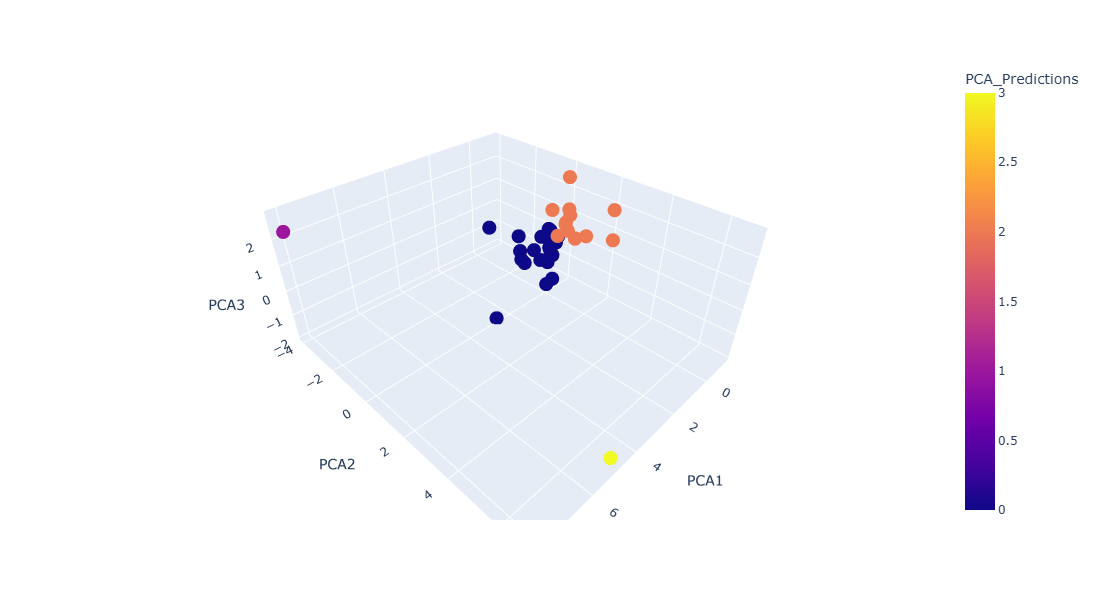

In [36]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import plotly.express as px
# Create a 3D scatter plot using plotly
market_pca_prediction_3d = market_pca_prediction.reset_index()
fig = px.scatter_3d(
    market_pca_prediction_3d, 
    x='PCA1', 
    y='PCA2', 
    z='PCA3', 
    color='PCA_Predictions',
    hover_data=['Crypto_names'])

fig.update_layout( width=1000, height=600)  # Adjust the height as needed
fig.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
df_elbow_plot + elbow_pca_plot

:Layout
   .Curve.I  :Curve   [k1]   (inertia)
   .Curve.II :Curve   [k2]   (inertia)

In [37]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
df_market_prediction_plot + market_pca_prediction_3d

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
Reducing the number of features can make the clustering results easier to interpret. With fewer dimensions, it becomes simpler to visualize the clusters and understand the relationships between different data points.
: Fewer features may help eliminate noise in the data. High-dimensional datasets often contain irrelevant or redundant features that can obscure meaningful patterns. By focusing on the most significant features, the clustering algorithm can perform betterts.

Risk of Losing Information: While reducing features can simplify the analysis, it also risks losing important information. If the removed features were significant for distinguishing between clusters, the quality of the clustering may decline.

Curse of Dimensionality: High-dimensional data can lead to the "curse of dimensionality," where the distance metrics used in clustering become less meaningful. By reducing dimensions, the algorithm can better capture the structure of the data.

Overall, the impact of using fewer features in K-Means clustering is a trade-off between simplicity and potential loss of critical information. It is essential to evaluate the clustering results to ensure that the reduced feature set still captures the necessary patterns in the data.